<h3><center>Data Driven Organization Final Project
    <br>By Group 4 </br></h3></center>

<h3><b>Exploratory Data Analysis</b></h3>

In [32]:
#Import libraries and packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read in the csv from Github
df = pd.read_csv("https://raw.githubusercontent.com/JinmingChen12/DATA_SCIENCE/main/CleanDonorData.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df

,FakeID,PrimaryAffiliation,Person/Org,City,State,Zip,FiscalYear,ContributionDate,Amount,ContributionType,DesignationCode,DesignationName,VSEPurpose,College,DesignationType,DesignationPurpose,PaymentType
0,8363,Alum,P,West Orange,NJ,7052,2016,7/1/2015,500,Gift,AF08,RIETS Annual Fund,3A02 - Academic Divisions,RIETS,Unrestricted,Annual Fund,Credit Card
1,7205,Alum,P,New York,NY,10014,2016,7/1/2015,250,Gift,AF04,Benjamin N. Cardozo School of Law Annual Fund,3A02 - Academic Divisions,Cardozo School of Law,Unrestricted,Annual Fund,Credit Card
2,10976,Parent of Past Student,P,Bronx,NY,10463,2016,7/1/2015,100,Gift,B313,The Jay Stepelman Memorial Award for Excellenc...,NaN,High Schools (combined),Restricted,NaN,Credit Card
3,18472,Friend,P,Great Neck,NY,11023,2016,7/1/2015,10,Gift,GU06,Yeshiva University Hs for Girls General Unrest...,NaN,High Schools (combined),Unrestricted,Annual Fund,Credit Card
4,11833,Alum,P,Forest Hills,NY,11375,2016,7/1/2015,25,Gift,GU06,Yeshiva University Hs for Girls General Unrest...,NaN,High Schools (combined),Unrestricted,Annual Fund,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57152,15804,Alum,P,NaN,NaN,NaN,2020,6/30/2020,7,Gift,B011,Toronto Alumni Scholarship,3A08 - Student Financial Aid,Yeshiva University,Restricted,Annual Fund,Cash or Check
57153,15804,Alum,P,NaN,NaN,NaN,2020,6/30/2020,7,Gift,B011,Toronto Alumni Scholarship,3A08 - Student Financial Aid,Yeshiva University,Restricted,Annual Fund,Cash or Check
57154,16975,Alum,P,NaN,NaN,NaN,2020,6/30/2020,50,Gift,AS00,Yeshiva University Annual Scholarship Fund,3A08 - Student Financial Aid,Yeshiva University,Restricted,Annual Fund,Lockbox Holding
57155,18150,Alum,P,NaN,NaN,NaN,2020,6/30/2020,1000,Gift,GU08,RIETS General Unrestricted Fund,3A02 - Academic Divisions,RIETS,Unrestricted,Annual Fund,Cash or Check


In [2]:
#Find the number of rows and columns in the data set.
df.shape

(57157, 17)

In [3]:
df.isnull().sum().sort_values(ascending=False)/(len(df))*100

DesignationPurpose    36.950855
VSEPurpose            11.151740
State                  6.721836
Zip                    6.571374
City                   4.849800
PaymentType            0.000000
FiscalYear             0.000000
PrimaryAffiliation     0.000000
Person/Org             0.000000
Amount                 0.000000
ContributionDate       0.000000
ContributionType       0.000000
DesignationCode        0.000000
DesignationName        0.000000
College                0.000000
DesignationType        0.000000
FakeID                 0.000000
dtype: float64

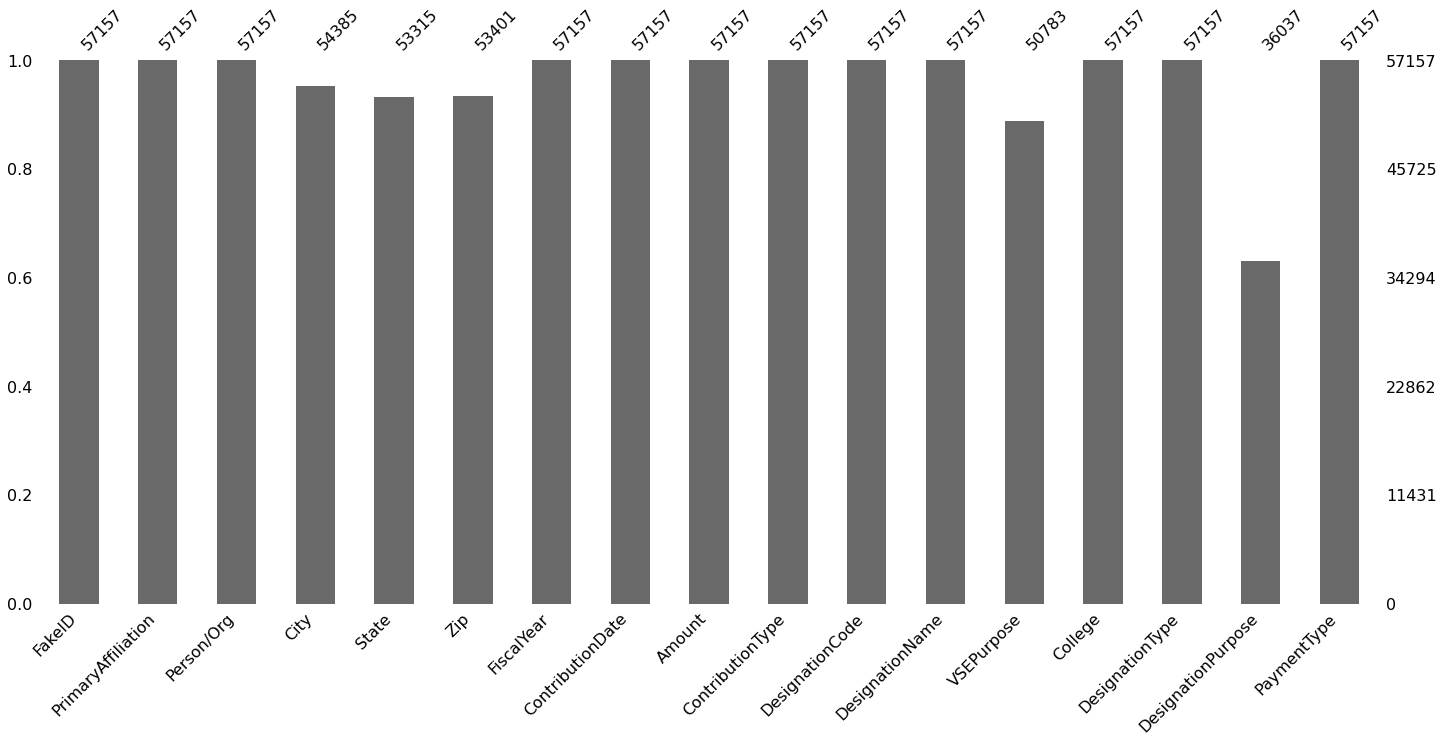

In [4]:
#Visualize the amount of missing data using missingno's bar chart
msno.bar(df);

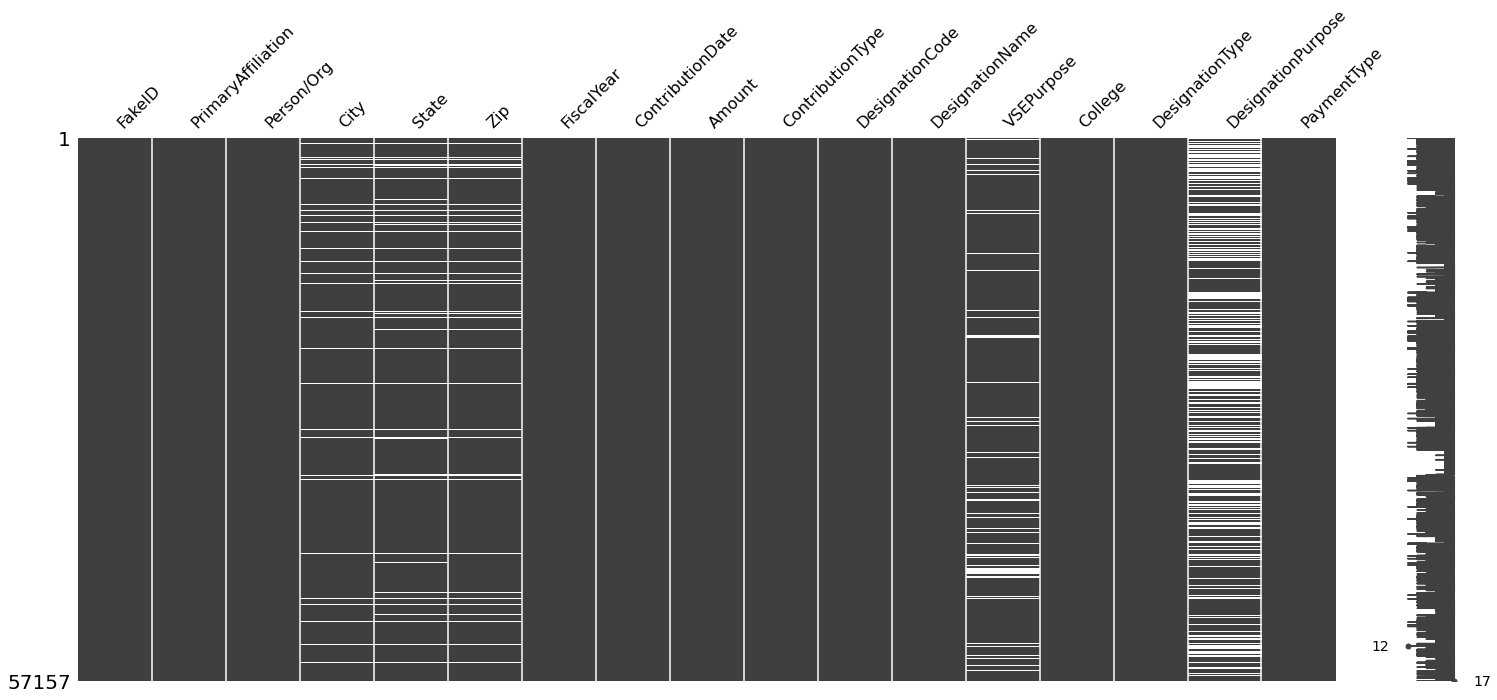

In [5]:
#Use missingnos matrix to see if there is a pattern to the missing data
ax = msno.matrix(df)
ax.get_figure();

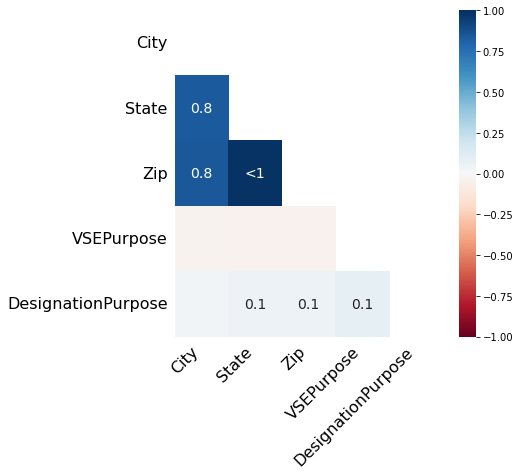

In [6]:
#Graph a heat map of the missing data to see if the locations where the data are missing are correlated.
ax = msno.heatmap(df, figsize = (6,6))
ax.get_figure(); 

We see that there is a pattern to our missing data.  Since the missing values are not random, we will drop all rows that have missing data instead of imputing the missing values.

In [7]:
#Get summary statistics for each numeric variable including mean, standard deviation, minimum, maximum, and quartiles
df.describe()

,FakeID,FiscalYear,Amount
count,57157.000000,57157.000000,5.715700e+04
mean,9774.774971,2017.859702,3.521196e+03
std,5599.811531,1.355814,3.729329e+04
min,1.000000,2016.000000,0.000000e+00
25%,5048.000000,2017.000000,5.000000e+01
50%,9793.000000,2018.000000,1.000000e+02
75%,14520.000000,2019.000000,4.200000e+02
max,19667.000000,2020.000000,2.526000e+06


In [8]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57157 entries, 0 to 57156
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FakeID              57157 non-null  int64 
 1   PrimaryAffiliation  57157 non-null  object
 2   Person/Org          57157 non-null  object
 3   City                54385 non-null  object
 4   State               53315 non-null  object
 5   Zip                 53401 non-null  object
 6   FiscalYear          57157 non-null  int64 
 7   ContributionDate    57157 non-null  object
 8   Amount              57157 non-null  int64 
 9   ContributionType    57157 non-null  object
 10  DesignationCode     57157 non-null  object
 11  DesignationName     57157 non-null  object
 12  VSEPurpose          50783 non-null  object
 13  College             57157 non-null  object
 14  DesignationType     57157 non-null  object
 15  DesignationPurpose  36037 non-null  object
 16  PaymentType         57

In [9]:
# Pre-review the data
df.nunique()

FakeID                19343
PrimaryAffiliation       18
Person/Org                2
City                   1520
State                    55
Zip                    2803
FiscalYear                5
ContributionDate       1576
Amount                 1472
ContributionType          4
DesignationCode         717
DesignationName         717
VSEPurpose               19
College                  18
DesignationType           7
DesignationPurpose        2
PaymentType              12
dtype: int64

In [10]:
df.columns

Index(['FakeID', 'PrimaryAffiliation', 'Person/Org', 'City', 'State', 'Zip',
       'FiscalYear', 'ContributionDate', 'Amount', 'ContributionType',
       'DesignationCode', 'DesignationName', 'VSEPurpose', 'College',
       'DesignationType', 'DesignationPurpose', 'PaymentType'],
      dtype='object')

In [11]:
# Drop column that useless
df= df.drop(columns=['FakeID'])
df.head()

,PrimaryAffiliation,Person/Org,City,State,Zip,FiscalYear,ContributionDate,Amount,ContributionType,DesignationCode,DesignationName,VSEPurpose,College,DesignationType,DesignationPurpose,PaymentType
0,Alum,P,West Orange,NJ,7052,2016,7/1/2015,500,Gift,AF08,RIETS Annual Fund,3A02 - Academic Divisions,RIETS,Unrestricted,Annual Fund,Credit Card
1,Alum,P,New York,NY,10014,2016,7/1/2015,250,Gift,AF04,Benjamin N. Cardozo School of Law Annual Fund,3A02 - Academic Divisions,Cardozo School of Law,Unrestricted,Annual Fund,Credit Card
2,Parent of Past Student,P,Bronx,NY,10463,2016,7/1/2015,100,Gift,B313,The Jay Stepelman Memorial Award for Excellenc...,NaN,High Schools (combined),Restricted,NaN,Credit Card
3,Friend,P,Great Neck,NY,11023,2016,7/1/2015,10,Gift,GU06,Yeshiva University Hs for Girls General Unrest...,NaN,High Schools (combined),Unrestricted,Annual Fund,Credit Card
4,Alum,P,Forest Hills,NY,11375,2016,7/1/2015,25,Gift,GU06,Yeshiva University Hs for Girls General Unrest...,NaN,High Schools (combined),Unrestricted,Annual Fund,Credit Card


In [12]:
#Create lists of numerical and categorical attributes

col_cat=['PrimaryAffiliation', 'Person/Org', 'City', 'State', 'Zip',
       'FiscalYear', 'ContributionDate',  'ContributionType',
       'DesignationCode', 'DesignationName', 'VSEPurpose', 'College',
       'DesignationType', 'DesignationPurpose', 'PaymentType']

col_num=['Amount']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numeric attributes:%s" %len(col_num))

# of categorical attributes:15
# of numeric attributes:1


Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

<h4><b>Bar Chart</b></h4>

We will now check the boxplots for outliers.

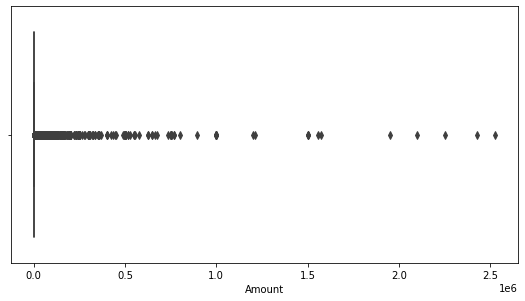

In [13]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,50))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(9,2,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

We see that our data has a lot of outliers.  

<h3><b>Data Preparation</b></h3>

Create dummy variables for the categorical variables.

In [14]:

#Create dummy variables for categorical variables
df2 = pd.get_dummies(df,columns=['PrimaryAffiliation', 'Person/Org', 
       'FiscalYear', 'ContributionType',
       'DesignationCode', 'DesignationName', 'VSEPurpose', 'College',
       'DesignationType', 'DesignationPurpose', 'PaymentType'],
drop_first=False)

#Check results
df2.head()

,City,State,Zip,ContributionDate,Amount,PrimaryAffiliation_Alum,PrimaryAffiliation_Alumni - High Schools,PrimaryAffiliation_Board Member,PrimaryAffiliation_Board of Trustees,PrimaryAffiliation_Cardozo Parent,...,PaymentType_Cash or Check,PaymentType_Conditional Gift,PaymentType_Credit Card,PaymentType_Grants,PaymentType_Lockbox Holding,PaymentType_Matching Gift,PaymentType_Paper Credits,PaymentType_Payroll Deduction,PaymentType_Stocks and Securities,PaymentType_Wire Transfer
0,West Orange,NJ,7052,7/1/2015,500,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,New York,NY,10014,7/1/2015,250,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Bronx,NY,10463,7/1/2015,100,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Great Neck,NY,11023,7/1/2015,10,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Forest Hills,NY,11375,7/1/2015,25,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<h3><b> Prepped Data Review</h3></b>

In [15]:
#Get summary statistics including mean, standard deviation, minimum, maximum, and quartiles
df2.describe()

,Amount,PrimaryAffiliation_Alum,PrimaryAffiliation_Alumni - High Schools,PrimaryAffiliation_Board Member,PrimaryAffiliation_Board of Trustees,PrimaryAffiliation_Cardozo Parent,PrimaryAffiliation_Corporation,PrimaryAffiliation_Donor Advised Fund,PrimaryAffiliation_Einstein Alumni,PrimaryAffiliation_Estate or Bequest,...,PaymentType_Cash or Check,PaymentType_Conditional Gift,PaymentType_Credit Card,PaymentType_Grants,PaymentType_Lockbox Holding,PaymentType_Matching Gift,PaymentType_Paper Credits,PaymentType_Payroll Deduction,PaymentType_Stocks and Securities,PaymentType_Wire Transfer
count,5.715700e+04,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,...,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000,57157.000000
mean,3.521196e+03,0.499589,0.014539,0.007716,0.012737,0.011495,0.010252,0.002117,0.001697,0.007593,...,0.413160,0.000017,0.447259,0.000560,0.057771,0.007908,0.000052,0.010987,0.002519,0.052837
std,3.729329e+04,0.500004,0.119699,0.087500,0.112138,0.106596,0.100735,0.045962,0.041161,0.086808,...,0.492405,0.004183,0.497215,0.023655,0.233311,0.088576,0.007245,0.104244,0.050131,0.223710
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.526000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df2.columns

Index(['City', 'State', 'Zip', 'ContributionDate', 'Amount',
       'PrimaryAffiliation_Alum', 'PrimaryAffiliation_Alumni - High Schools',
       'PrimaryAffiliation_Board Member',
       'PrimaryAffiliation_Board of Trustees',
       'PrimaryAffiliation_Cardozo Parent',
       ...
       'PaymentType_Cash or Check', 'PaymentType_Conditional Gift',
       'PaymentType_Credit Card', 'PaymentType_Grants',
       'PaymentType_Lockbox Holding', 'PaymentType_Matching Gift',
       'PaymentType_Paper Credits', 'PaymentType_Payroll Deduction',
       'PaymentType_Stocks and Securities', 'PaymentType_Wire Transfer'],
      dtype='object', length=1526)

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

In [22]:
col_cat2=df2.drop(columns=['Amount'])


col_cat2

,City,State,Zip,ContributionDate,PrimaryAffiliation_Alum,PrimaryAffiliation_Alumni - High Schools,PrimaryAffiliation_Board Member,PrimaryAffiliation_Board of Trustees,PrimaryAffiliation_Cardozo Parent,PrimaryAffiliation_Corporation,...,PaymentType_Cash or Check,PaymentType_Conditional Gift,PaymentType_Credit Card,PaymentType_Grants,PaymentType_Lockbox Holding,PaymentType_Matching Gift,PaymentType_Paper Credits,PaymentType_Payroll Deduction,PaymentType_Stocks and Securities,PaymentType_Wire Transfer
0,West Orange,NJ,7052,7/1/2015,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,New York,NY,10014,7/1/2015,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Bronx,NY,10463,7/1/2015,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Great Neck,NY,11023,7/1/2015,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Forest Hills,NY,11375,7/1/2015,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57152,NaN,NaN,NaN,6/30/2020,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57153,NaN,NaN,NaN,6/30/2020,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57154,NaN,NaN,NaN,6/30/2020,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57155,NaN,NaN,NaN,6/30/2020,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
col_num2=df2.Amount
col_num2

0          500
1          250
2          100
3           10
4           25
         ...  
57152        7
57153        7
57154       50
57155     1000
57156    21555
Name: Amount, Length: 57157, dtype: int64

As the data preparation shows, there are many uniqure values in both numerical data and  categorical variables. In the future study, we will use feature selection to limit the features/attribues. 